# 图像评价指标测试

In [12]:
import pyiqa
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms import ToTensor

In [19]:
high_quality_image = ToTensor()(Image.open('../datasets/test/GT/1_36.jpg').convert('RGB'))[None, ::]
low_quality_image = ToTensor()(Image.open('../datasets/test/IN/1_36.jpg').convert('RGB'))[None, ::]
random_data = torch.randn(1, 3, high_quality_image.shape[2], high_quality_image.shape[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


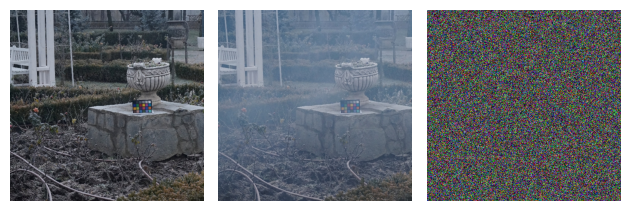

In [23]:
images = [
    high_quality_image.squeeze().permute(1, 2, 0), 
    low_quality_image.squeeze().permute(1, 2, 0), 
    random_data.squeeze().permute(1, 2, 0)
]
fig, axs = plt.subplots(1, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i])
    ax.axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

## NIQE（Natural Image Quality Evaluator）
> 得分越低，表示图像质量越好

NIQE是一种无参考图像空间质量评估指标，用于评估图像的失真程度。
该指标能够估计图像的自然感知质量，无需参考图像或主观评分。
NIQE指标的计算基于图像的局部特征，通过分析图像的统计特征来估计图像的质量。


In [16]:
niqe = pyiqa.create_metric("niqe")

niqe_hqi = niqe(high_quality_image).item()
niqe_lqi = niqe(low_quality_image).item()
niqe_rd = niqe(random_data).item()

print("高质量图片NIQE值:{:.2f}".format(niqe_hqi))
print("低质量图片NIQE值:{:.2f}".format(niqe_lqi))
print("随机数据NIQE值:{:.2f}".format(niqe_rd))

高质量图片NIQE值:5.60
低质量图片NIQE值:4.92
随机数据NIQE值:26.21


## NIMA（Neural Image Assessment） 
> 得分越高，表示图像质量越好

NIMA是一种无参考技术，它可以预测图像的质量，而不依赖于通常不可用的原始参考图像。
NIMA使用CNN来预测每个图像的质量分数分布。在1到10的范围内，NIMA会将这张图的得分可能性分配给这10个分数。

In [17]:
nima = pyiqa.create_metric("nima")
nima_hqi = nima(high_quality_image).item()
nima_lqi = nima(low_quality_image).item()
nima_rd = nima(random_data).item()

print("高质量图片NIMA值:{:.2f}".format(nima_hqi))
print("低质量图片NIMA值:{:.2f}".format(nima_lqi))
print("随机数据NIMA值:{:.2f}".format(nima_rd))

Loading pretrained model NIMA from C:\Users\earthyzinc\.cache\torch\hub\checkpoints\NIMA_VGG16_ava-dc4e8265.pth
高质量图片NIMA值:5.41
低质量图片NIMA值:5.60
随机数据NIMA值:5.37


## BRISQUE（Blind/Referenceless Image Spatial Quality Evaluator） 
> 得分越低，表示图像质量越好

BRISQUE是一种无参考图像空间质量评估指标，用于评估图像的失真程度。
BRISQUE指标的计算基于图像的局部特征，通过分析图像的统计特征来估计图像的质量。
BRISQUE的评价依据是自然图像的亮度归一化后是趋向于高斯分布的，而失真会破坏这种分布，所以通过测量这种统计特征的改变可以达到衡量失真程度的目的。

In [18]:
brisque = pyiqa.create_metric("brisque")

brisque_hqi = brisque(high_quality_image).item()
brisque_lqi = brisque(low_quality_image).item()
brisque_rd = brisque(random_data).item()

print("高质量图片BRISQUE值:{:.2f}".format(brisque_hqi))
print("低质量图片BRISQUE值:{:.2f}".format(brisque_lqi))
print("随机数据BRISQUE值:{:.2f}".format(brisque_rd))

高质量图片BRISQUE值:35.94
低质量图片BRISQUE值:20.62
随机数据BRISQUE值:100.29


## PSNR
> 得分越高，表示图像质量越好

PSNR全称为“Peak Signal-to-Noise Ratio”，中文意思即为峰值信噪比，是衡量图像质量的指标之一。
PSNR是基于MSE (均方误差)定义。

In [20]:
psnr = pyiqa.create_metric("psnr")
psnr_hl = psnr(high_quality_image, low_quality_image).item()
psnr_hr = psnr(high_quality_image, random_data).item()
psnr_lr = psnr(low_quality_image, random_data).item()

print("高质量图片与低质量图片相比PSNR值:{:.2f}".format(psnr_hl))
print("高质量图片与随机数据相比PSNR值:{:.2f}".format(psnr_hr))
print("低质量图片与随机数据相比PSNR值:{:.2f}".format(psnr_lr))

高质量图片与低质量图片相比PSNR值:14.72
高质量图片与随机数据相比PSNR值:-0.52
低质量图片与随机数据相比PSNR值:-0.88


## SSIM (结构相似性指数)
> 得分越高，表示图像质量越好

SSIM是一种用于量化两幅图像间的结构相似性的指标。与L2损失函数不同，SSIM仿照人类的视觉系统（Human Visual System,HVS）实现了结构相似性的有关理论，对图像的局部结构变化的感知敏感。
SSIM从亮度、对比度以及结构量化图像的属性，用均值估计亮度，方差估计对比度，协方差估计结构相似程度。SSIM值的范围为0至1，越大代表图像越相似。如果两张图片完全一样时，SSIM值为1。

In [21]:
ssim = pyiqa.create_metric("ssim")
ssim_hl = ssim(high_quality_image, low_quality_image).item()
ssim_hr = ssim(high_quality_image, random_data).item()
ssim_lr = ssim(low_quality_image, random_data).item()

print("高质量图片与低质量图片相比SSIM值:{:.2f}".format(ssim_hl))
print("高质量图片与随机数据相比SSIM值:{:.2f}".format(ssim_hr))
print("低质量图片与随机数据相比SSIM值:{:.2f}".format(ssim_lr))

高质量图片与低质量图片相比SSIM值:0.64
高质量图片与随机数据相比SSIM值:0.00
低质量图片与随机数据相比SSIM值:-0.00


# LPIPS (Learned Perceptual Image Patch Similarity)
> 得分越低，表示图像质量越好

LPIPS是一种评估图像质量的指标，它是基于人类感知的视觉系统而设计的。
LPIPS使用了深度学习技术为每个图像提取特征，并基于这些特征计算它们之间的相似度。
LPIPS的值越低表示两张图像越相似，反之，则差异越大。

In [22]:
lpips = pyiqa.create_metric("lpips")
lpips_hl = lpips(high_quality_image, low_quality_image).item()
lpips_hr = lpips(high_quality_image, random_data).item()
lpips_lr = lpips(low_quality_image, random_data).item()

print("高质量图片与低质量图片相比LPIPS 值:{:.2f}".format(lpips_hl))
print("高质量图片与随机数据相比LPIPS 值:{:.2f}".format(lpips_hr))
print("低质量图片与随机数据相比LPIPS 值:{:.2f}".format(lpips_lr))

C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\earthyzinc\Programs\miniconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pretrained model LPIPS from C:\Users\earthyzinc\.cache\torch\hub\checkpoints\LPIPS_v0.1_alex-df73285e.pth
高质量图片与低质量图片相比LPIPS 值:0.34
高质量图片与随机数据相比LPIPS 值:1.33
低质量图片与随机数据相比LPIPS 值:1.43
